# Taxi Cab

## Download the files
`kaggle competitions download -c new-york-city-taxi-fare-prediction`

I actually saved it offline and process because the size is so large.

In [192]:
# get the data file
# !pip install kaggle

# Clean up the data

In [193]:
# Import the file, and only keep 10000 rows for now
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
train_df = pd.read_csv('./data/train.csv', nrows = 10000)
test_df = pd.read_csv('./data/test.csv', nrows = 10000)

In [195]:
# Check out the column names and 
# column's data type to get used to the data.
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [196]:
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [197]:
# check if there's any NaN value inside the data set and remove it
train_df.isna().sum()
train_df = train_df.dropna(how = 'any', axis = 'rows')

key -> time of when the data is recorded -> not relevant -> can drop

In [198]:
# drop key from train and test
train_df = train_df.drop(['key'], axis=1)
test_df = test_df.drop(['key'], axis=1)

In [199]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


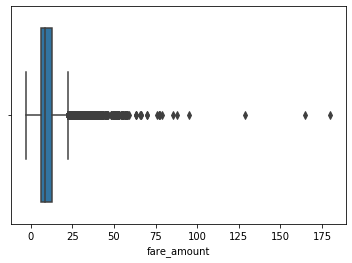

In [200]:
sns.boxplot(x=train_df['fare_amount'])

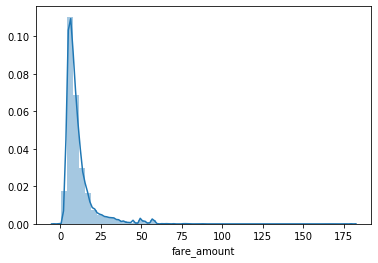

In [201]:
sns.distplot(train_df['fare_amount'])

In [202]:
# some trip cost more than 175 dollar,
# some trip cost less than 0 dollar.
# let's normalize our dataset.
condition1 = (train_df['fare_amount'] > 0)
condition2 = train_df['fare_amount'] < ((train_df['fare_amount'].mean() + \
              3 * train_df['fare_amount'].std()))
train_df = train_df.loc[condition1 & condition2]

In [203]:
(train_df['fare_amount'].mean() + \
              3 * train_df['fare_amount'].std())

29.28263085968993

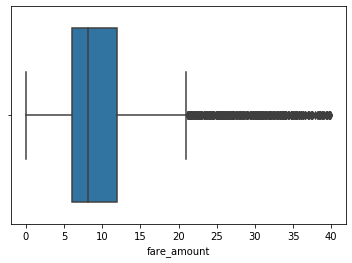

In [204]:
sns.boxplot(x=train_df['fare_amount'])

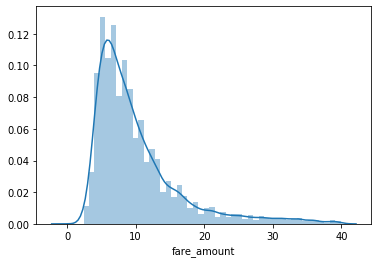

In [205]:
sns.distplot(train_df['fare_amount'])

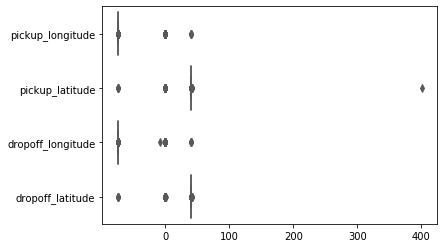

In [206]:
sns.boxplot(data=train_df[['pickup_longitude',\
                           'pickup_latitude', \
                           'dropoff_longitude',\
                           'dropoff_latitude']], orient='h', palette='Set2')

Ok, we know from here that NYC's longitude and latitude is 40.73 and -73.9. There is definitely outlier in this dataset, which is needed to be removed.

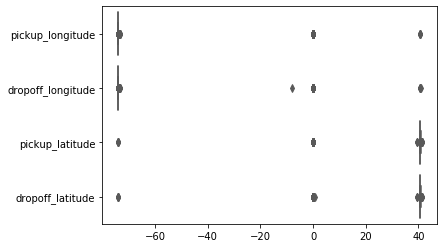

In [207]:
# let's remove the one far out at 400 in the pickup latitude
train_df = train_df[train_df['pickup_latitude'] < 100]
sns.boxplot(data=train_df[['pickup_longitude',\
                           'dropoff_longitude',\
                           'pickup_latitude', \
                           'dropoff_latitude']], orient='h', palette='Set2')

In [208]:
# pick up
# Let's restrict latitude coordinate near 40-42
condition1 = train_df['pickup_latitude'] > 40
condition2 = train_df['pickup_latitude'] < 42
# Let's restrict longitude coordinate near -74 - -72
condition3 = train_df['pickup_longitude'] > -74
condition4 = train_df['pickup_longitude'] < -72

# drop off
# Let's restrict latitude coordinate near 40-42
condition5 = train_df['dropoff_latitude'] > 40
condition6 = train_df['dropoff_latitude'] < 42
# Let's restrict longitude coordinate near -74 - -72
condition7 = train_df['dropoff_longitude'] > -74
condition8 = train_df['dropoff_longitude'] < -72

In [209]:
train_df=train_df.loc[condition1 & \
                 condition2 & \
                 condition3 & \
                 condition4 & \
                 condition5 & \
                 condition6 & \
                 condition7 & \
                 condition8]

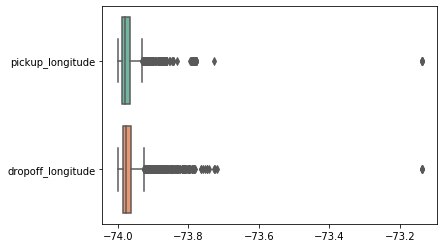

In [210]:
# let see how it looks now.
sns.boxplot(data=train_df[['pickup_longitude',\
                           'dropoff_longitude']], orient='h', palette='Set2')

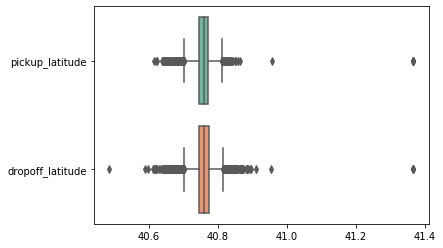

In [211]:
sns.boxplot(data=train_df[['pickup_latitude', \
                           'dropoff_latitude']], orient='h', palette='Set2')

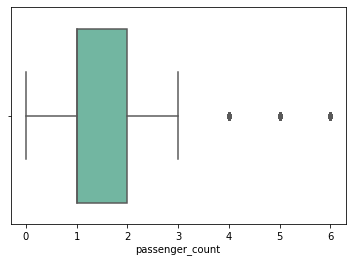

In [212]:
# let see the last column
sns.boxplot(x=train_df['passenger_count'], orient='h', palette='Set2')

In [213]:
condition1 = train_df['passenger_count'] > 0
condition2 = train_df['passenger_count'] <= 6
train_df=train_df.loc[condition1 & \
                 condition2]

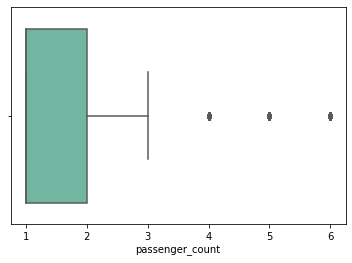

In [214]:
# let see the last column
sns.boxplot(x=train_df['passenger_count'], orient='h', palette='Set2')

# Deriving Features

In [215]:
# Let's find out the distance of 
# each trip since coordinates are given!

def dist(dropoff, pickup):
    '''
    This function calculate the distance between two point.
    It can be longitude difference between dropoff and pickup.
    Or it can be latitude difference between dropoff and pickup.
    '''
    return dropoff - pickup

In [216]:
train_df['longitude_change'] = dist(train_df['dropoff_longitude'],\
                                    train_df['pickup_longitude'])
train_df['latitude_change'] = dist(train_df['dropoff_latitude'],\
                                   train_df['pickup_latitude'])

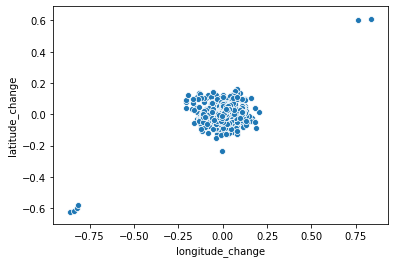

In [217]:
sns.scatterplot(train_df['longitude_change'], train_df['latitude_change'])

Since the trip is within the bound of NYC, the difference in coordinate should not be greater than 1, and this scatter plot seems to confirm this, so the dataset is fine here.

In the event that more data is read, maybe setting up a bound to ensure only keep rows that have difference in coordinates that are less than 1.

In [218]:
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_change,latitude_change
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,-0.009041
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,-0.008504,-0.010708
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,-0.004437,0.024949
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,0.006200,0.013180


`'2009-06-15 17:26:21 UTC'`
We can probably just keep only the numbers and timezone we can specify by the `datetime` package

The datetime information on the dataset can be processed to extract out the year, month, and hours. The date can event be converted to a datetime object for more information!

In [219]:
import datetime
train_df['pickup_datetime_dt'] = train_df.pickup_datetime.apply(
    lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d'))

train_df['pickup_datetime'] = train_df['pickup_datetime'].str.slice(0, 16)



train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'],\
                                             utc=True,\
                                             format='%Y-%m-%d %H:%M')

In [220]:
train_df.dtypes

fare_amount                       float64
pickup_datetime       datetime64[ns, UTC]
pickup_longitude                  float64
pickup_latitude                   float64
dropoff_longitude                 float64
dropoff_latitude                  float64
passenger_count                     int64
longitude_change                  float64
latitude_change                   float64
pickup_datetime_dt         datetime64[ns]
dtype: object

In [221]:
train_df['year'] = train_df.pickup_datetime.dt.year
train_df['month'] = train_df.pickup_datetime.dt.month
train_df['day'] = train_df.pickup_datetime.dt.hour
train_df['day'] = train_df.pickup_datetime.dt.day

train_df['year'] = train_df['year'].astype('int')
train_df['month'] = train_df['month'].astype('int')
train_df['day'] = train_df['day'].astype('int')
train_df['hour'] = train_df['day'].astype('int')
train_df['day_of_week'] = train_df.pickup_datetime.dt.day_name(locale = 'English')


In [222]:
train_df['day_of_week']

0          Monday
2        Thursday
3        Saturday
4         Tuesday
6         Tuesday
          ...    
9992     Saturday
9994       Friday
9995    Wednesday
9997     Saturday
9998     Thursday
Name: day_of_week, Length: 7367, dtype: object

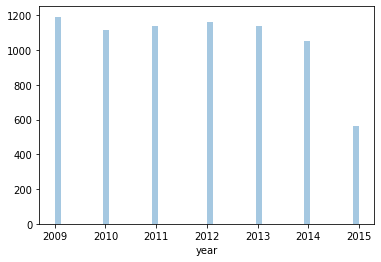

In [223]:
sns.distplot(train_df['year'], bins=50, kde=False)

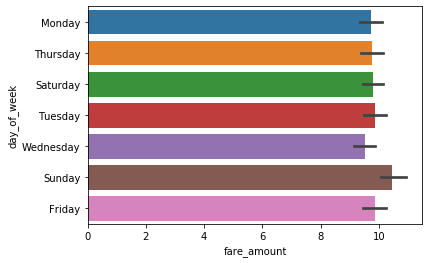

In [224]:
sns.barplot(x="fare_amount", y='day_of_week', data=train_df)

In [225]:
def f(x):
    if (x >= 5) and (x <= 11):
        return 'Morning'
    elif (x >= 12) and (x <= 17):
        return 'Afternoon'
    elif (x >= 18) and (x <= 22):
        return 'Evening'
    else:
        return 'Night'

In [226]:
train_df['time_of_day'] = train_df['hour'].apply(f)

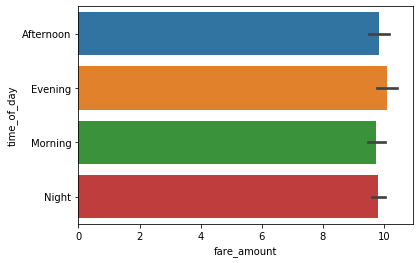

In [227]:
sns.barplot(x="fare_amount", y='time_of_day', data=train_df)

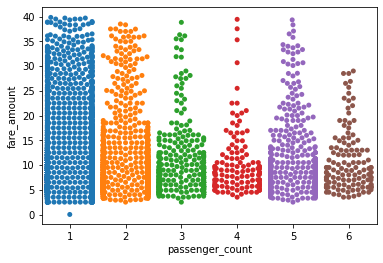

In [228]:
sns.swarmplot(y="fare_amount", x='passenger_count', data=train_df)

In [229]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2009-01-01', end='2015-12-31').to_pydatetime()

train_df['holidat_or_not'] = train_df.pickup_datetime_dt.apply(lambda x: 1 if x in holidays else 0)

In [230]:
set(train_df.holidat_or_not.tolist())

{0, 1}

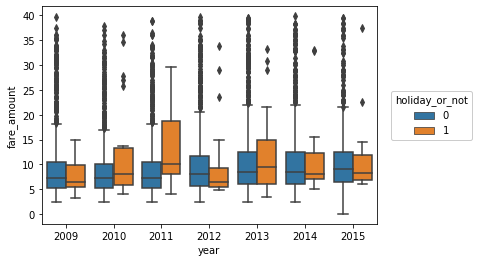

In [267]:
ax = sns.boxplot(x="year", y="fare_amount", hue="holidat_or_not",\
                 data=train_df);
ax.legend(loc='center right', ncol=1,\
          title='holiday_or_not',\
          framealpha=1, frameon=True,\
          bbox_to_anchor=(1.3, 0.5))

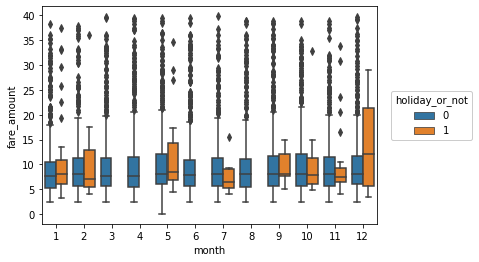

In [268]:
ax = sns.boxplot(x="month", y="fare_amount", hue="holidat_or_not",\
                 data=train_df);
ax.legend(loc='center right', ncol=1,\
          title='holiday_or_not',\
          framealpha=1, frameon=True,\
          bbox_to_anchor=(1.3, 0.5))